# PageRank analysis 
This notebook analyzes the *PageRank* algorithm from a computational perspective, exploring how changes in the structure of a web graph influence the resulting ranking scores.

In this exercise, we extend a baseline web graph by introducing an additional page that forms mutual links with an existing one. This modification affects the corresponding transition matrix \( M \), and therefore the stationary distribution that defines the PageRank vector.

Our goals are to:
- construct the updated link matrix,
- apply the damping factor \( m = 0.15 \),
- compute the eigenvector associated with the eigenvalue \( \lambda = 1 \),
- and normalize it so that all components are positive and sum to one.

The notebook provides a clear, step-by-step derivation of these computations, combining theoretical insights with numerical implementation to obtain the updated PageRank values.


## Exercise 11

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import colormaps
from ipywidgets import interact, FloatSlider
import networkx as nx
from matplotlib.animation import FuncAnimation

A = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
], dtype=float)
n = A.shape[0]


def pagerank_power_method_classic(A,n,m, max_iter=1000, tol=1e-10):
    S = np.ones((n, n)) / n
    M = (1 - m) * A + m * S
    v = np.ones(n)
    v /= np.linalg.norm(v, 2)
    
    lam_old = None
    lambdas = []
    errors = []
    history = [v.copy()]
    
    for _ in range(max_iter):
        w = M @ v
        lam = v @ w
        lambdas.append(lam)
        v = w / np.linalg.norm(w, 2)
        history.append(v.copy())
        
        if lam_old is None:
            errors.append(np.nan)
        else:
            error = abs(lam - lam_old)
            errors.append(error)
            if error < tol * max(abs(lam), 1e-12):
                break      
        lam_old = lam
        
    v = v / v.sum()
    return v, np.array(lambdas), np.array(errors), np.array(history)



def plot_pagerank_classic(m):
    v,_,_,_ = pagerank_power_method_classic(A,n,m)
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n+1), v)
    plt.ylim(0, 0.5)
    plt.xlabel('Page')
    plt.ylabel('Rank')
    plt.title(f'PageRank ($m$ = {m:.2f})')

    for i, val in enumerate(v):
        plt.text(i+1, val + 0.01, f"{val:.3f}", ha='center')
        
    plt.show()


interact(plot_pagerank_classic,m=FloatSlider(value=0.15, min=0.0, max=1.0, step=0.01, description='m'));

interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, step=0.01), Output()), _dom_classes=('…

In [2]:
def plot_rayleigh_and_error(m):
    _,lambdas, errors,_ = pagerank_power_method_classic(A,n,m)

    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    ax[0].plot(lambdas, marker='o')
    ax[0].set_title("Rayleigh Quotient Evolution")
    ax[0].set_xlabel("Iteration")
    
    mask = np.isfinite(errors)
    ax[1].plot(np.where(mask)[0], errors[mask], marker='o')
    ax[1].set_yscale("log")
    ax[1].set_title("|λ(k+1) − λ(k)| (log scale)")
    ax[1].set_xlabel("Iteration")
    plt.tight_layout() 
    plt.show()


interact(
    plot_rayleigh_and_error,
    m=FloatSlider(value=0.15, min=0.0, max=1.0, step=0.01, description='m')
);


interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, step=0.01), Output()), _dom_classes=('…

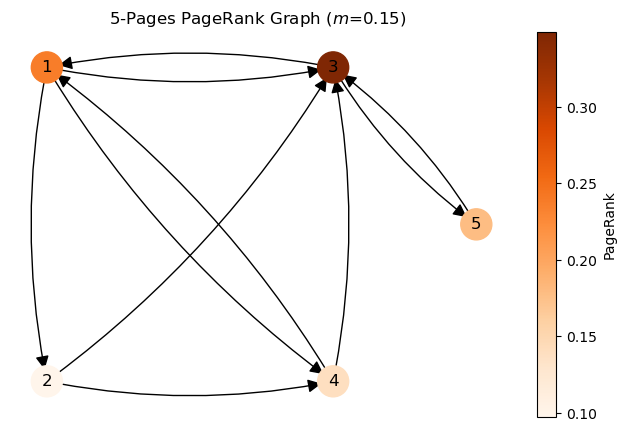

In [3]:
v,_,_,_ = pagerank_power_method_classic(A,n,0.15)

G = nx.DiGraph()
G.add_nodes_from(range(1,5))

for i in range(n):
    for j in range(n):
        if A[i,j] > 0:
            G.add_edge(j+1, i+1)

pos = {
    1: (0, 1),     
    3: (1, 1),     
    2: (0, 0),     
    4: (1, 0),     
    5: (1.5, 0.5)  
}

norm = plt.Normalize(v.min(), v.max())
node_colors = plt.cm.Oranges(norm(v))  


fig, ax = plt.subplots(figsize=(8,5))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

for (u,v_) in G.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v_)],
                           connectionstyle='arc3,rad=0.1',
                           arrowstyle='-|>', arrowsize=20,
                           ax=ax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm.set_array(v)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('PageRank')

ax.set_title(f'5-Pages PageRank Graph ($m$={0.15})')
ax.axis('off') 
plt.show()

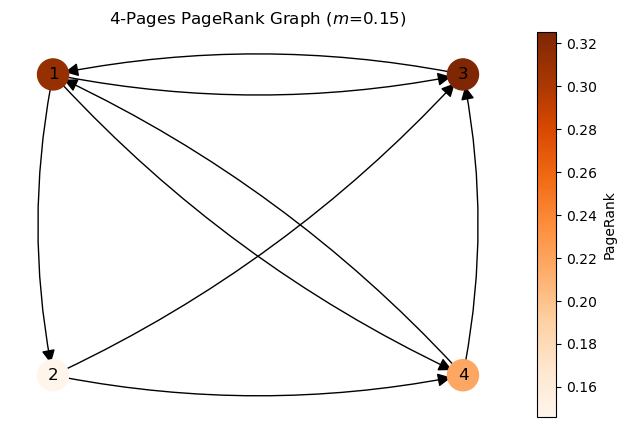

In [4]:
A4 = np.array([
    [0,   0,   1/2, 1/2],
    [1/3, 0,   0,   0],
    [1/3, 1/2, 0,   1/2],
    [1/3, 1/2, 0,   0]
])
n4=A4.shape[0]
v,_,_,_ = pagerank_power_method_classic(A4,n4,0.15)

G = nx.DiGraph()
G.add_nodes_from(range(1,n4+1))

for i in range(n4):
    for j in range(n4):
        if A[i,j] > 0:
            G.add_edge(j+1, i+1)


pos = {
    1: (0, 1),     
    3: (1, 1),     
    2: (0, 0),    
    4: (1, 0),  
}

norm = plt.Normalize(v.min(), v.max())
node_colors = plt.cm.Oranges(norm(v))  

fig, ax = plt.subplots(figsize=(8,5))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

for (u,v_) in G.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v_)],
                           connectionstyle='arc3,rad=0.1',
                           arrowstyle='-|>', arrowsize=20,
                           ax=ax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm.set_array(v)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('PageRank')

ax.set_title(f'4-Pages PageRank Graph ($m$={0.15})')
ax.axis('off')  
plt.show()

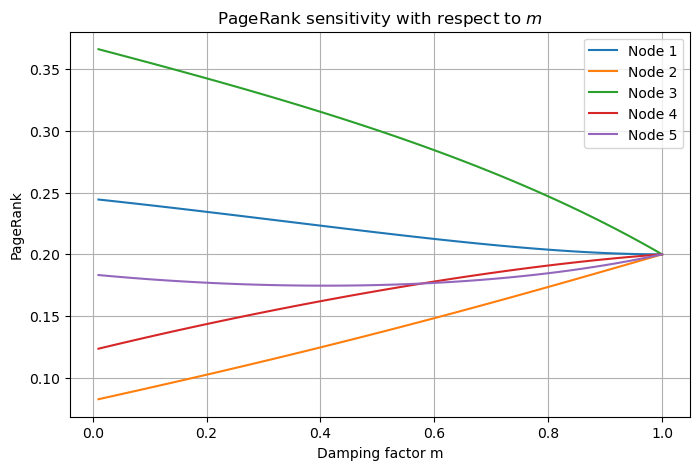

In [5]:
m_values = np.linspace(0.01, 1, 50)
pagerank_vs_m = []

for m_val in m_values:
    pr, _, _, _ = pagerank_power_method_classic(A, n,m=m_val)
    pagerank_vs_m.append(pr)

pagerank_vs_m = np.array(pagerank_vs_m)

plt.figure(figsize=(8, 5))
for i in range(n):
    plt.plot(m_values, pagerank_vs_m[:, i], label=f'Node {i+1}')

plt.xlabel('Damping factor m')
plt.ylabel('PageRank')
plt.title('PageRank sensitivity with respect to $m$')
plt.legend(loc='upper right')
plt.grid(True) 
plt.show()

In [6]:
def plot_pagerank_comparison(m=0.15):
    nodes = ['1','2','3','4']
    v5,_,_,_ = pagerank_power_method_classic(A,n, m)
    v4,_,_,_ = pagerank_power_method_classic(A4,n4, m)
    
    x = np.arange(len(nodes))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(x - width/2, v5[:4], width, label='5-Pages Web')
    ax.bar(x + width/2, v4, width, label='4-Pages Web')

    ax.set_xticks(x)
    ax.set_xticklabels(nodes)
    ax.set_xlabel('Page')
    ax.set_ylabel('PageRank')
    ax.set_title(f'PageRank Comparison: 4-Pages Web vs 5-Pages Web ($m$={m:.2f})')
    ax.legend(loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


interact(plot_pagerank_comparison, m=FloatSlider(value=0.15, min=0.01, max=1, step=0.01, description='m'));


interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, min=0.01, step=0.01), Output()), _dom_…

In [7]:
def plot_pagerank_difference_relative(m=0.15):
    nodes = ['1','2','3','4']    
    v5,_,_,_ = pagerank_power_method_classic(A,n, m)
    v4,_,_,_= pagerank_power_method_classic(A4,n4, m)
    v5_trim = v5[:4]
    
    diff_rel = ((v5_trim - v4) / v4) * 100
    
    x = np.arange(len(nodes))
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(x, diff_rel, width=0.3, color='green', alpha=0.8)  

    ax.set_xticks(x)
    ax.set_xticklabels(nodes)
    ax.set_title(f'Page 5 Impact on 4-Pages Web PageRank  ($m$=0.15)', fontsize=13)
    ax.set_xlabel('Page')
    ax.set_ylabel('Relative Difference (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)   
    plt.show()

interact(plot_pagerank_difference_relative, m=FloatSlider(value=0.15, min=0.01, max=1, step=0.01, description='m'));



interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, min=0.01, step=0.01), Output()), _dom_…